In [2]:
import pandas as pd
df=pd.read_csv('/content/dress.csv')

In [3]:
df.head()

,_unit_id,category,category:confidence,image_url
0,851505458,ikat,0.3487,http://s3-eu-west-1.amazonaws.com/we-attribute...
1,851505459,plain,1.0000,http://s3-eu-west-1.amazonaws.com/we-attribute...
2,851505460,polka dot,0.6709,http://s3-eu-west-1.amazonaws.com/we-attribute...
3,851505461,plain,1.0000,http://s3-eu-west-1.amazonaws.com/we-attribute...
4,851505462,geometry,0.7035,http://s3-eu-west-1.amazonaws.com/we-attribute...


In [4]:
import urllib
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [5]:
def show_image_from_url(image_url):
  response=urllib.request.urlopen(image_url)
  image=np.asarray(bytearray(response.read(),),dtype="uint8")
  image_bgr=cv2.imdecode(image,cv2.IMREAD_COLOR)
  image_rgb=cv2.cvtColor(image_bgr,cv2.COLOR_BGR2RGB)
  plt.imshow(image_rgb),plt.axis('off')

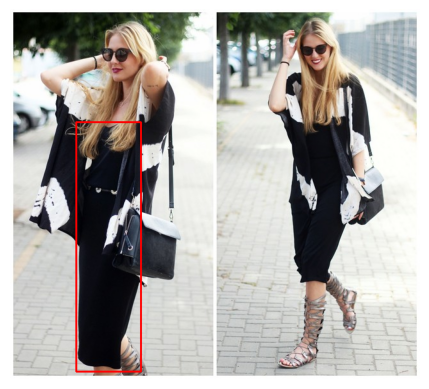

In [6]:
plt.figure()
show_image_from_url(df['image_url'].loc[9564])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15702 entries, 0 to 15701
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   _unit_id             15702 non-null  int64  
 1   category             15702 non-null  object 
 2   category:confidence  15702 non-null  float64
 3   image_url            15702 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 490.8+ KB


In [7]:
print("All categories :\n",df["category"].unique())

All categories :
 ['ikat' 'plain' 'polka dot' 'geometry' 'floral' 'squares' 'scales'
 'animal' 'OTHER' 'stripes' 'tribal' 'houndstooth' 'cartoon' 'chevron'
 'stars' 'letter_numb' 'skull']


In [8]:
n_classes=df["category"].nunique()

In [9]:
print('Total number of unique categories:', n_classes)


Total number of unique categories: 17


In [10]:
df=df.loc[df['category']!='OTHER'].reset_index(drop=True)

In [11]:
def image_processing(image_url):
     response = urllib.request.urlopen(image_url)
     image=np.asarray(bytearray(response.read()),dtype='uint8')
     image_bgr=cv2.imdecode(image,cv2.IMREAD_COLOR)
     image_hsv=cv2.cvtColor(image_bgr,cv2.COLOR_BGR2HSV)
     image_gray=cv2.cvtColor(image_bgr,cv2.COLOR_BGR2GRAY)
     mask=cv2.inRange(image_hsv,(0,255,255),(0,255,255))
     if len(np.where(mask!=0)[0])!=0:
         y1=min(np.where(mask!=0)[0])
         y2=max(np.where(mask!=0)[0])
     else:
         y1=0
         y2=len(mask)
     if len(np.where(mask!=0)[1])!=0:
          x1=min(np.where(mask!=0)[1])
          x2=max(np.where(mask!=0)[1])
     else:
          x1=0
          x2=len(mask[0])

     image_cropped=image_gray[y1:y2,x1:x2]
     image_100100=cv2.resize(image_cropped,(100,100))
     image_arr=image_100100.flatten()
     return image_arr




In [12]:
!pip install gdown

In [14]:
import gdown

In [15]:
url = 'https://drive.google.com/uc?id=1B6_rtcmGRy49hqpwoJT-_Ujnt6cYj5Ba'
output = 'X.npy'
gdown.download(url, output, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1B6_rtcmGRy49hqpwoJT-_Ujnt6cYj5Ba
From (redirected): https://drive.google.com/uc?id=1B6_rtcmGRy49hqpwoJT-_Ujnt6cYj5Ba&confirm=t&uuid=abe97c81-3734-44c9-9668-289aaf83d017
To: /content/X.npy
100%|██████████| 1.22G/1.22G [00:13<00:00, 92.6MB/s]


'X.npy'

In [26]:
X = np.load('/content/X.npy')
X[0:3]


array([[0.29803922, 0.29803922, 0.29803922, ..., 0.60392157, 0.6       ,
        0.29803922],
       [0.4627451 , 0.29803922, 0.29803922, ..., 0.29803922, 0.29803922,
        0.29803922],
       [0.30196078, 0.29803922, 0.29803922, ..., 0.29803922, 0.29803922,
        0.29803922]])

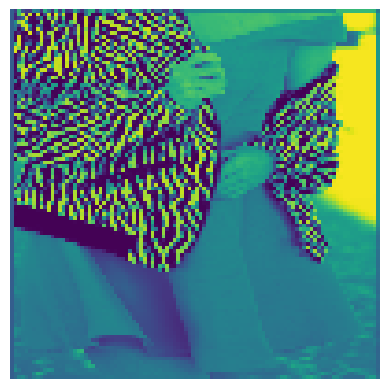

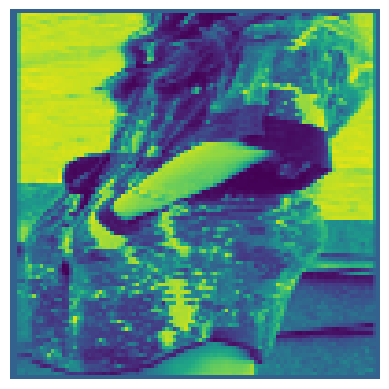

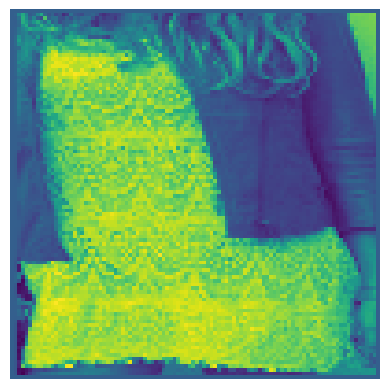

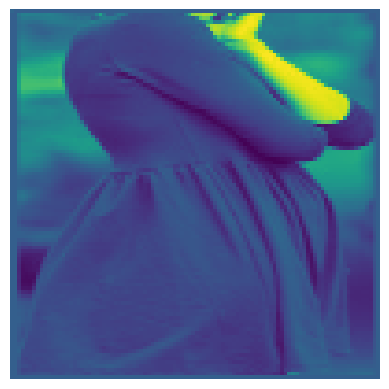

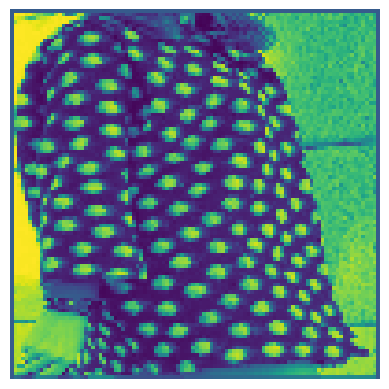

In [18]:
np.random.seed(17)
for i in np.random.randint(0,len(X),5):
  plt.figure()
  plt.imshow(X[i].reshape(100,100))
  plt.axis('off')

In [19]:
from sklearn.preprocessing import LabelEncoder    #For encoding categorical variables
encoder=LabelEncoder()
Targets=encoder.fit_transform(df['category'])
Targets

array([ 6,  8,  9, ..., 12, 15,  9])

In [20]:
Targets.shape

(15189,)

In [21]:
from tensorflow.keras.utils import to_categorical


In [22]:
Y=to_categorical(Targets,num_classes=n_classes)

In [24]:
Y[0:3]



array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0.]], dtype=float32)

In [25]:
Y.shape

(15189, 17)

In [28]:
from sklearn.model_selection import train_test_split #For splitting of dataset


In [29]:
X_test = X[14000:,]
Y_test = Y[14000:,]
X_train, X_val, Y_train, Y_val = train_test_split(X[:14000,], Y[:14000,], test_size=0.15, random_state=13)


In [30]:
img_rows, img_cols = 100, 100
input_shape = (img_rows, img_cols, 1)


In [31]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

X_val.shape


(2100, 100, 100, 1)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense


In [35]:
model=Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu',
                 input_shape = input_shape))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(n_classes, activation='softmax'))
learning_rate = 0.001


In [37]:
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam


In [38]:
model.compile(loss=categorical_crossentropy,optimizer=Adam(learning_rate),metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 16)        160       
                                                                 
 batch_normalization (Batch  (None, 98, 98, 16)        64        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 16)        2320      
                                                                 
 batch_normalization_1 (Bat  (None, 96, 96, 16)        64        
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 16)        0         
 D)                                                              
                                                        

In [41]:
from tensorflow.keras.callbacks import ModelCheckpoint


In [42]:
save_at = "/content/model.hdf5"
save_best = ModelCheckpoint (save_at, monitor='val_accuracy', verbose=0, save_best_only=True, save_weights_only=False, mode='max')


In [45]:
history=model.fit(X_train,Y_train,epochs=15,batch_size=100,callbacks=[save_best],verbose=1,validation_data=(X_val,Y_val))

Epoch 1/15
119/119 [==============================] - ETA: 0s - loss: 2.0771 - accuracy: 0.5829

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


119/119 [==============================] - 329s 3s/step - loss: 2.0771 - accuracy: 0.5829 - val_loss: 2.9146 - val_accuracy: 0.0443
Epoch 2/15
119/119 [==============================] - 316s 3s/step - loss: 1.3723 - accuracy: 0.6581 - val_loss: 1.5826 - val_accuracy: 0.5638
Epoch 3/15
119/119 [==============================] - 312s 3s/step - loss: 1.2955 - accuracy: 0.6798 - val_loss: 1.6768 - val_accuracy: 0.5714
Epoch 4/15
119/119 [==============================] - 310s 3s/step - loss: 1.2585 - accuracy: 0.6762 - val_loss: 1.3004 - val_accuracy: 0.6657
Epoch 5/15
119/119 [==============================] - 308s 3s/step - loss: 1.2082 - accuracy: 0.6889 - val_loss: 1.2834 - val_accuracy: 0.6790
Epoch 6/15
119/119 [==============================] - 311s 3s/step - loss: 1.1608 - accuracy: 0.6955 - val_loss: 1.2559 - val_accuracy: 0.6933
Epoch 7/15
119/119 [==============================] - 307s 3s/step - loss: 1.1229 - accuracy: 0.7024 - val_loss: 1.3752 - val_accuracy: 0.6752
Epoch 8/15

In [47]:
from tensorflow.keras.models import load_model


In [48]:
model = load_model('/content/model.hdf5')
score = model.evaluate(X_test, Y_test, verbose=0)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')


Accuracy over the test set: 
  69.22 %


In [49]:
Y_pred = np.round(model.predict(X_test))


38/38 [==============================] - 7s 175ms/step


In [51]:
Y_pred

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

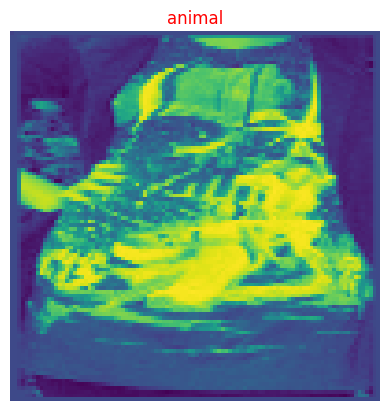

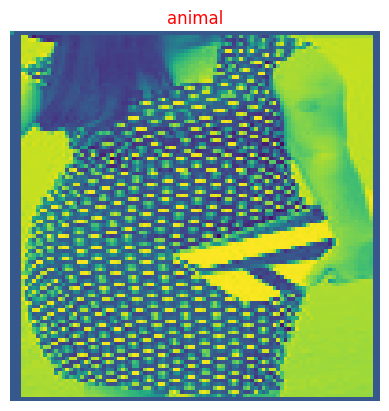

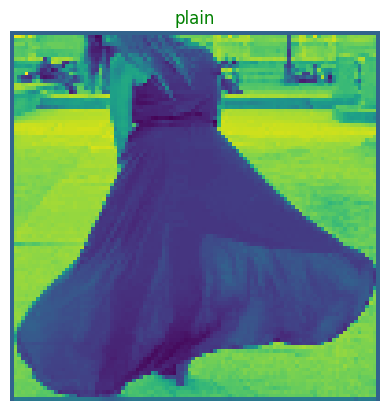

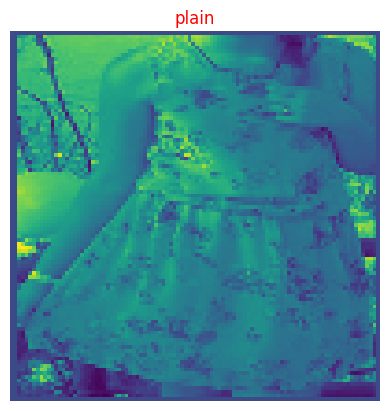

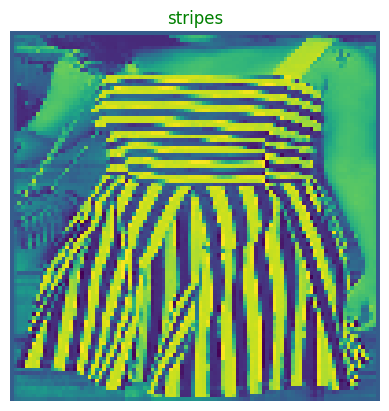

In [50]:
np.random.seed(87)
for rand_num in np.random.randint(0, len(Y_test), 5):
  plt.figure()
  plt.imshow(X_test[rand_num].reshape(100, 100)), plt.axis('off')
  if np.where(Y_pred[rand_num] == 1)[0].sum() == np.where(Y_test[rand_num] == 1)[0].sum():
    plt.title(encoder.classes_[np.where(Y_pred[rand_num] == 1)[0].sum()], color='g')
  else :
    plt.title(encoder.classes_[np.where(Y_pred[rand_num] == 1)[0].sum()], color='r')
